In [2]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Créer un widget de saisie de texte
text_input = widgets.Text(
    value='',
    placeholder='Entrez votre texte ici',
    description='Texte:',
    disabled=False
)

# Créer un bouton
button = widgets.Button(description="Afficher le texte")

# Créer une zone de sortie pour afficher le texte
output = widgets.Output()

# Définir la fonction à exécuter lors du clic sur le bouton
def on_button_click(b):
    with output:
        output.clear_output()
        print(text_input.value)

# Associer la fonction au clic du bouton
button.on_click(on_button_click)

# Afficher les widgets
display(text_input, button, output)


Text(value='', description='Texte:', placeholder='Entrez votre texte ici')

Button(description='Afficher le texte', style=ButtonStyle())

Output()

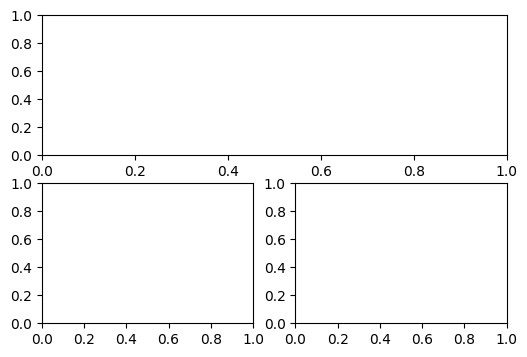

In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Widgets
date_input = widgets.Text(placeholder='AAAA/M/J', description='Date :')
button_valider = widgets.Button(description="Valider la date", button_style='success')
output = widgets.Output()

# Figure
fig = plt.figure(figsize=(6, 4))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Callback
date_de_reference = None

def on_valider_clicked(b):
    global date_de_reference
    with output:
        clear_output()
        if date_input.value.strip():
            date_de_reference = date_input.value.strip()
            print(f"✅ Date enregistrée : {date_de_reference}")
        else:
            print("⚠️ Format invalide.")

button_valider.on_click(on_valider_clicked)

# Interface complète
display(widgets.VBox([
    widgets.HTML("<h4>🗓️ Saisir la date de référence :</h4>"),
    date_input,
    button_valider,
    output
]))

plt.show()


In [4]:
import pandas as pd
df_test = pd.DataFrame({
    "Atelier": ["A", "B", "A", "B", "C", "C", "C", "A"],
    "Classe": [">3mois", "<1 mois", "2 à 3 mois", "2 à 3 mois", ">3mois", "<1 mois", "<1 mois", "1 à 2 mois"]
})

df_test

,Atelier,Classe
0,A,>3mois
1,B,<1 mois
2,A,2 à 3 mois
3,B,2 à 3 mois
4,C,>3mois
5,C,<1 mois
6,C,<1 mois
7,A,1 à 2 mois


In [5]:
pivot_table=(df_test
             .groupby(['Atelier', 'Classe'])
             .size()
             .unstack(fill_value=0))

pivot_table

Classe,1 à 2 mois,2 à 3 mois,<1 mois,>3mois
Atelier,,,,
A,1,1,0,1
B,0,1,1,0
C,0,0,2,1


In [6]:
pivot_table["Total"] = pivot_table.sum(axis=1)

pivot_table

Classe,1 à 2 mois,2 à 3 mois,<1 mois,>3mois,Total
Atelier,,,,,
A,1,1,0,1,3
B,0,1,1,0,2
C,0,0,2,1,3


In [7]:
pivot_table.sort_values(by="Total", ascending=False, inplace=True)

pivot_table

Classe,1 à 2 mois,2 à 3 mois,<1 mois,>3mois,Total
Atelier,,,,,
A,1,1,0,1,3
C,0,0,2,1,3
B,0,1,1,0,2


In [8]:
pivot_table.drop(columns='Total')
pivot_table=pivot_table.reset_index()

In [9]:
melted_table=pivot_table.melt(
    id_vars='Atelier',
    var_name='Classe',
    value_name='Nombre'
)

melted_table

,Atelier,Classe,Nombre
0,A,1 à 2 mois,1
1,C,1 à 2 mois,0
2,B,1 à 2 mois,0
3,A,2 à 3 mois,1
4,C,2 à 3 mois,0
5,B,2 à 3 mois,1
6,A,<1 mois,0
7,C,<1 mois,2
8,B,<1 mois,1
9,A,>3mois,1


In [11]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib import gridspec
import textwrap

# Zones de saisie
commentaire_retards = widgets.Textarea(
    value='',
    placeholder='Écris ici ton analyse des retards...',
    description='Retards :',
    layout=widgets.Layout(width='100%', height='80px'),
    style={'description_width': 'initial'}
)

commentaire_etats = widgets.Textarea(
    value='',
    placeholder='Écris ici ton analyse des statuts...',
    description='Statuts :',
    layout=widgets.Layout(width='100%', height='80px'),
    style={'description_width': 'initial'}
)

# Bouton de validation
button_commentaires = widgets.Button(
    description="Ajouter les commentaires au graphique",
    button_style='info'
)

# Zone de sortie
output_commentaires = widgets.Output()

# Fonction de génération du graphique avec les commentaires
def generer_graphique(commentaire1, commentaire2):
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

    ax1 = fig.add_subplot(gs[0])
    ax1.text(0.5, 0.5, "Graphique des retards", ha='center', va='center')
    ax1.set_title("Zone retards")
    ax1.axis('off')

    ax2 = fig.add_subplot(gs[1])
    ax2.text(0, 0.5, textwrap.fill(commentaire1, width=80), va='center')
    ax2.set_title("Commentaire sur les retards")
    ax2.axis('off')

    ax3 = fig.add_subplot(gs[2])
    ax3.text(0, 0.5, textwrap.fill(commentaire2, width=80), va='center')
    ax3.set_title("Commentaire sur les statuts")
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

# Fonction appelée au clic
def on_valider_commentaires_clicked(b):
    with output_commentaires:
        clear_output()
        commentaire1 = commentaire_retards.value.strip()
        commentaire2 = commentaire_etats.value.strip()
        generer_graphique(commentaire1, commentaire2)

# Connexion du bouton
button_commentaires.on_click(on_valider_commentaires_clicked)

# Affichage
display(widgets.VBox([
    widgets.HTML("<h4>📝 Analyse manuelle à intégrer au rapport :</h4>"),
    commentaire_retards,
    commentaire_etats,
    button_commentaires,
    output_commentaires
]))


In [9]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec 
import seaborn as sns
import textwrap
import ipywidgets as widgets
from IPython.display import display, clear_output

date_input = widgets.Text(
    placeholder='AAAA/M/J ou AAAA-MM-JJ',
    description='Date :',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)

button_valider = widgets.Button(
    description="Valider la date",
    button_style='success'
)




display(date_input, button_valider)


Text(value='', description='Date :', layout=Layout(width='300px'), placeholder='AAAA/M/J ou AAAA-MM-JJ', style…

Button(button_style='success', description='Valider la date', style=ButtonStyle())